## Stock price prediction 

sources: 
- https://www.askpython.com/python/examples/stock-price-prediction-python
- https://towardsdatascience.com/easiest-guide-to-getting-stock-data-with-python-f74b5f75d179
- https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
- https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/

In [11]:
# Import libraries

import sys
!pip install -U -q segmentation_models
!pip install -U -q tensorflow==2.4.1
!pip install -U -q keras==2.3.1
!pip install -U -q tensorflow-estimator==2.4.0
!pip install -U -q yfinance

import tensorflow as tf
import tensorflow.keras
#import segmentation_models as sm

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM


import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler

print('importing finished')

importing finished


In [28]:
# The following code does four things:
# 1) download Tesla stock data
# 2) turn it inta a Pandas DataFrame
# 3) Reset the indext so the date value becomes a regular column
# 4) show the first 5 rows
stock_name = input("Enter a stock price name (such as TSLA, AAPL): ")
TICK = yf.download(stock_name)
TICK = pd.DataFrame(TICK)
TICK.reset_index(inplace=True)
print(f"-----{stock_name} stock overview-----")
TICK.head()

Enter a stock price name (such as TSLA, AAPL): AAPL
[*********************100%***********************]  1 of 1 completed
-----AAPL stock overview-----


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600


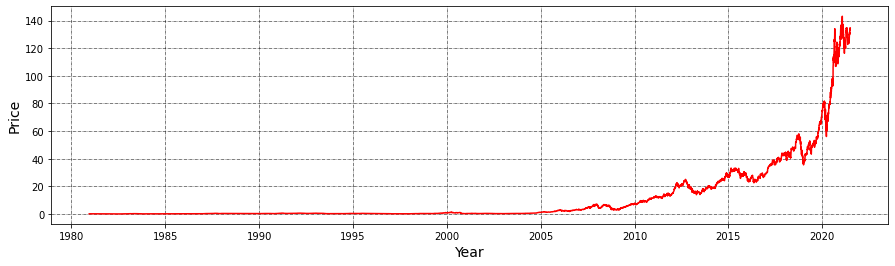

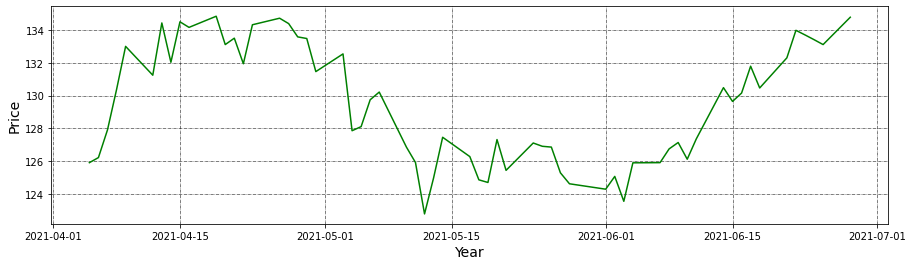

In [56]:
#  Plotting date vs the close market stock price

plt.figure(figsize=(15, 4))
plt.plot(TICK['Date'],TICK['Close'],color="red")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Extract only top 60 rows to make the plot a little clearer
small = TICK.tail(60)

#  Plotting date vs the close  market stock price
plt.figure(figsize=(15, 4))
plt.plot(small['Date'],small['Close'],color="green")
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

plt.show()

In [57]:
# 1. Filter out the closing market price data
close_data = TICK.filter(['Close'])

# 2. Convert the data into array for easy evaluation
dataset = close_data.values

# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]

# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])

    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)

    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [58]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

7096/7096 [==============================] - 403s 56ms/step - loss: 1.0112e-05


In [60]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [61]:
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

2.051637216233324


/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


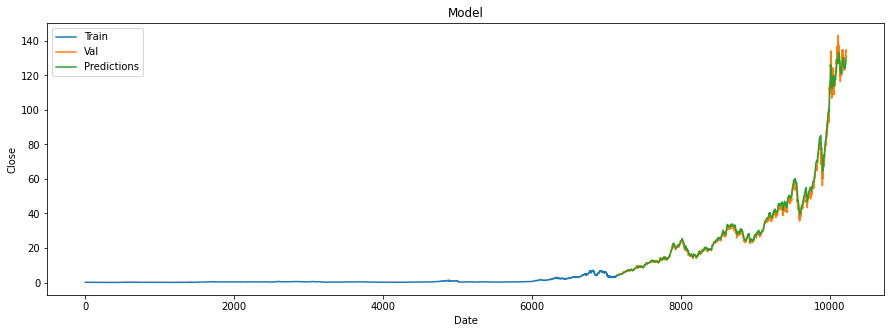

In [71]:
train = TICK[:training_data_len]
valid = TICK[training_data_len:]

valid['Predictions'] = predictions

plt.figure(figsize=(15, 5))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


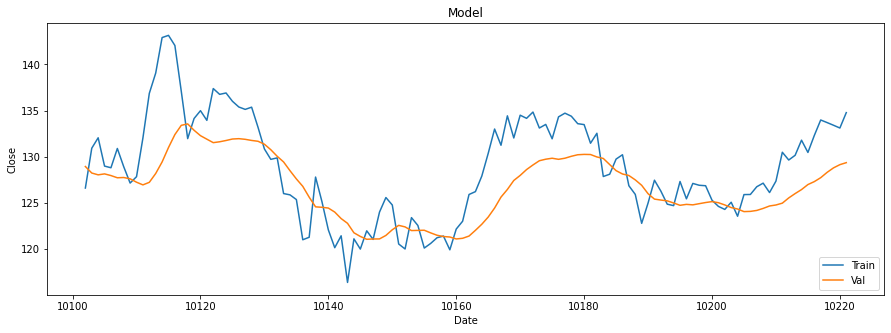

In [76]:
#we cannot plot the training data as it doesnt exsist in the last 60 data points (only prediction and validation data).

#small_train = train[-120:]
small_valid = valid[-120:]
small_predictions = predictions[-120:]
small_valid['Predictions'] = small_predictions

plt.figure(figsize=(15, 5))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
#plt.plot(small_train['Close'])
plt.plot(small_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

To do:
- reduce RSME
- improve visualization
- make it easier to apply the model to different Stock data
- long term: find high potential sotck, or compare stock to eachother